In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import geopandas as gpd
import plotly.express as px
import seaborn as sns
from unidecode import unidecode
from sklearn.preprocessing import MinMaxScaler
import plotly.graph_objects as go



from imports import get_comp
from visualizations import print_scatter
pd.options.display.float_format = "{:,.2f}".format
pd.set_option('display.max_rows', 20)

cmap = {'APU': '#C7253D', 'AMU': '#53B2FF', 'APR': '#193E2E'}
cmap_grey = {'APU': '#E98695', 'AMU': '#5CB6FF', 'APR': '#40A075'}

In [2]:
comp = get_comp()
comp_APU = comp[comp["TIPAU"] == "APU"]
comp_AMU = comp[comp["TIPAU"] == "AMU"]
comp_APR = comp[comp["TIPAU"] == "APR"]
comp_1000 = comp[comp["TOTAL_INE_21"] >= 1000]

TypeError: no numeric data to plot

<Figure size 1000x600 with 0 Axes>

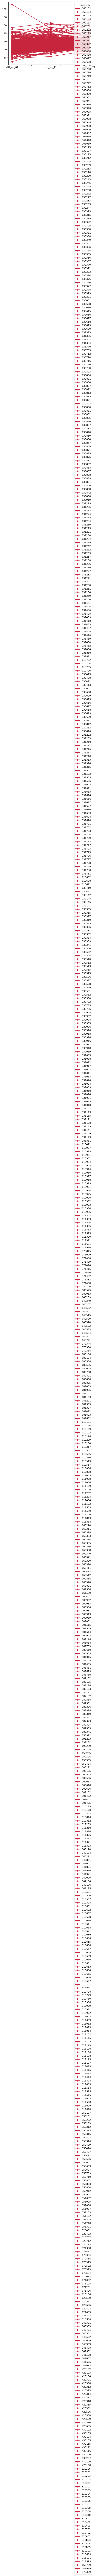

In [11]:
evolution = comp[['diff_rel_01', 'diff_rel_11', 'diff_rel_21', 'TIPAU']]
evolution = evolution[(evolution["TIPAU"] != "APR") & (evolution["TIPAU"] != "AMU")]

# Generate the plot
plt.figure(figsize=(10, 6))  # Set the figure size

for category, color in cmap.items():
    df_category = evolution[evolution['TIPAU'] == category].drop('TIPAU', axis=1)
    df_category.T.plot(marker='o', color=color)
    
plt.xlabel('Year')  # Set the x-axis label
plt.ylabel('Population')  # Set the y-axis label
plt.title('Population Evolution')  # Set the plot title
plt.grid(True)  # Add grid lines
plt.show()  # Display the plot

In [ ]:
comp.head()

In [ ]:
comp[comp["diff_rel_21"] < 0]["diff_rel_21"].describe()

In [ ]:
(comp["PT_MAI_21"].sum() - comp["PT_INE_21"].sum()) / comp["PT_INE_21"].sum()

In [ ]:
scaler = MinMaxScaler(feature_range=(1, 40))  # Adjust the feature range as needed
pt_ine_21_scaled = scaler.fit_transform(comp['PT_INE_21'].values.reshape(-1, 1)).flatten()

# Set the size parameter to 'log_PT_INE_21' in px.scatter
fig = px.scatter(comp, x='sec+_INE_21', y='diff_rel_21',
                 labels={
                     "diff_rel_21": "Erro Relativo (%)",
                     "sec+_INE_21": "Ensino Secundário Completo (%)"
                 },
                 color='TIPAU', color_discrete_map=cmap,
                 size=pt_ine_21_scaled,
                 size_max=40,
                 hover_data=['FF_DSG', "PT_INE_21", "PT_MAI_21"])


# Show the plot
fig.show()

In [ ]:
fig1 = print_scatter(comp, "sec+_INE_21", "diff_rel_21", "TIPAU","Ensino Secundário Completo (%)", "Erro Relativo (%)", name="sec_tipau.html", division="TIPAU")

In [ ]:
fig2 = print_scatter(comp, "sec+_INE_21", "diff_rel_21", "Tamanho","Ensino Secundário Completo (%)", "Erro Relativo (%)",  name="sec_pop.html",nbins=4, division="population")

In [ ]:
fig3 = print_scatter(comp, "desemprego_INE_21", "diff_rel_21", "TIPAU","Desemprego (%)", "Erro Relativo (%)", name="des_tipau.html",division="TIPAU")


In [ ]:
fig4 = print_scatter(comp, "desemprego_INE_21", "diff_rel_21", "Tamanho","Desemprego (%)", "Erro Relativo (%)",  name="des_pop.html", nbins=4, division="population")

In [ ]:
fig6 = print_scatter(comp, "65+_INE_21", "diff_rel_21", "TIPAU","Adultos >65 anos (%)", "Erro Relativo (%)", name="65_tipau.html",division="TIPAU")

In [ ]:
fig7 = print_scatter(comp, "65+_INE_21", "diff_rel_21", "Tamanho","Adultos >65 anos (%)", "Erro Relativo (%)", name="65_pop.html", nbins=4, division="population")

In [ ]:
fig8 = print_scatter(comp, "VAR_PT_21_11_rel", "diff_rel_21", "Tamanho",  "Variação População (2011-2021) (%)", "Erro Relativo (%)", name="varpop_pop.html", nbins=4, hover_data=["CC_DSG",'FF_DSG', "PT_INE_21", "PT_MAI_21", "PT_INE_11", "PT_MAI_11"], division="population")

In [ ]:
fig9 = print_scatter(comp, "VAR_PT_21_11_rel", "diff_rel_21", "TIPAU","Variação População (2011-2021) (%)", "Erro Relativo (%)",name="varpop_tipau.html", hover_data=["CC_DSG",'FF_DSG', "PT_INE_21", "PT_MAI_21", "PT_INE_11", "PT_MAI_11"], division="TIPAU")

In [ ]:
fig10 = print_scatter(comp, "diff_rel_11", "diff_rel_21", "TIPAU","Erro Relativo 2011 (%)", "Erro Relativo 2021 (%)", name="diff_tipau.html",hover_data=["CC_DSG",'FF_DSG', "PT_INE_21", "PT_MAI_21", "PT_INE_11", "PT_MAI_11"], division="TIPAU")

In [ ]:
fig11 = print_scatter(comp, "diff_rel_11", "diff_rel_21", "Tamanho","Erro Relativo 2011 (%)", "Erro Relativo 2021 (%)", name="diff_pop.html",hover_data=["CC_DSG",'FF_DSG', "PT_INE_21", "PT_MAI_21", "PT_INE_11", "PT_MAI_11"], division="population")

In [10]:
fig12 = print_scatter(comp, "prov_PT_INE_21", "diff_rel_21", "TIPAU","Provenientes de outras freguesias (%)", "Erro Relativo (%)", name="provPT_tipau.html", division="TIPAU")

Correlação geral: -0.2276663722861576


In [6]:
fig13 = print_scatter(comp, "prov_PT_INE_21", "diff_rel_21", "Tamanho","Provenientes de outras freguesias (%)", "Erro Relativo (%)", name="provPT_tipau.html", division="population")

Correlação geral: -0.2276663722861576


In [8]:
fig14 = print_scatter(comp, "prov_EST_INE_21", "diff_rel_21", "TIPAU","Provenientes do exterior (%)", "Erro Relativo (%)", name="provEST_tipau.html", division="TIPAU")

Correlação geral: 0.2035601886984905


In [9]:
fig14 = print_scatter(comp, "prov_EST_INE_21", "diff_rel_21", "Tamanho","Provenientes do exterior (%)", "Erro Relativo (%)", name="provEST_tipau.html", division="population")

Correlação geral: 0.2035601886984905


In [7]:
with open('auto-index.html', 'a') as f:
   
    f.write(fig12.to_html(full_html=False, include_plotlyjs='cdn'))
    f.write(fig13.to_html(full_html=False, include_plotlyjs='cdn'))

In [ ]:
print("Correlação geral: " + str(np.corrcoef(comp["sec+_INE_21"], comp["diff_rel_21"])[0][1]))

In [ ]:
district_stats1 = comp.groupby('Distrito')[var1].apply(lambda x: pd.Series({'weighted_mean_diff': (x * comp.loc[x.index, 'PT_INE_21']).sum() / comp.loc[x.index, 'PT_INE_21'].sum()}))
district_stats1 = pd.DataFrame(district_stats1).reset_index().drop(columns=["level_1"]).set_index("Distrito")
    

district_stats1 = comp.groupby('Distrito')[var1].apply(lambda x: pd.Series({'excesso_percentagem': x.sum() / comp[var1].sum() * 100}))
district_stats1 = pd.DataFrame(district_stats1).reset_index().drop(columns=["level_1"]).set_index("Distrito")

district_stats1.head()


In [ ]:
comp["diff_abs_21"].sum()

In [ ]:
district_stats.head()

In [ ]:
desloc_21.shape